# From Neurons to Networks: Exploring Deep Learning Algorithms

Roderick Perez, Ph.D.
OMV

---

In [270]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

In [271]:
# ReLU activation function
def relu(x):
    return np.maximum(0, x)

In [272]:
def relu_derivative(x):
    return np.where(x > 0, 1, 0)

In [273]:
# Mean Squared Error (MSE) and its derivative
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [274]:
def mse_derivative(y_true, y_pred):
    return -2 * (y_true - y_pred) / y_true.size

In [275]:
# Forward pass through the network
def forward_pass(inputs, weights, bias):
    z = np.dot(weights, inputs) + bias
    activated_output = relu(z)
    return z, activated_output

In [276]:
# Initialize the network parameters
inputs = np.array([2, 1, 3, -2])  # Input layer with 4 values
true_output = np.array([1, 0])   # True output we want (for training purposes)

In [277]:
# Initialize random weights and biases
input_size = inputs.shape[0]
weights = np.random.randn(2, input_size) * np.sqrt(2 / input_size) # np.zeros((2, input_size))  #np.random.randn(2, input_size) * np.sqrt(2 / input_size)
bias = np.ones(2)    

In [278]:
weights

array([[-0.46266923, -0.29418539,  0.66506741, -0.98424194],
       [-0.56539552,  1.23771886,  1.46958489, -0.28197092]])

In [279]:
bias

array([1., 1.])

In [280]:
# Training process
def train(inputs, true_output, weights, bias, learning_rate, epochs):
    errors = []

    for epoch in range(epochs):
        # Forward pass
        z, hidden_output = forward_pass(inputs, weights, bias)

        # Calculate error
        error = mse(true_output, hidden_output)
        errors.append(error)

        # Backpropagation: Compute gradients
        error_gradient = mse_derivative(true_output, hidden_output)
        relu_grad = relu_derivative(z)
        gradient = error_gradient * relu_grad
        
        # Update weights and biases (Gradient Descent)
        weights_gradient = np.dot(gradient[:, np.newaxis], inputs[np.newaxis, :])
        weights -= learning_rate * weights_gradient
        #bias -= learning_rate * gradient

        # Print progress
        print(f"Epoch {epoch+1}, Error: {error:.4f}")

    return weights, errors # bias

In [281]:
# Set learning rate and number of iterations (epochs)
learning_rate = 0.01
epochs = 100

In [282]:
# Train the network
weights, errors = train(inputs, true_output, weights, bias, learning_rate, epochs)

Epoch 1, Error: 22.2461
Epoch 2, Error: 14.9583
Epoch 3, Error: 10.0580
Epoch 4, Error: 6.7630
Epoch 5, Error: 4.5474
Epoch 6, Error: 3.0577
Epoch 7, Error: 2.0560
Epoch 8, Error: 1.3824
Epoch 9, Error: 0.9296
Epoch 10, Error: 0.6250
Epoch 11, Error: 0.4203
Epoch 12, Error: 0.2826
Epoch 13, Error: 0.1900
Epoch 14, Error: 0.1278
Epoch 15, Error: 0.0859
Epoch 16, Error: 0.0578
Epoch 17, Error: 0.0388
Epoch 18, Error: 0.0261
Epoch 19, Error: 0.0176
Epoch 20, Error: 0.0118
Epoch 21, Error: 0.0079
Epoch 22, Error: 0.0053
Epoch 23, Error: 0.0036
Epoch 24, Error: 0.0024
Epoch 25, Error: 0.0016
Epoch 26, Error: 0.0011
Epoch 27, Error: 0.0007
Epoch 28, Error: 0.0005
Epoch 29, Error: 0.0003
Epoch 30, Error: 0.0002
Epoch 31, Error: 0.0001
Epoch 32, Error: 0.0001
Epoch 33, Error: 0.0001
Epoch 34, Error: 0.0000
Epoch 35, Error: 0.0000
Epoch 36, Error: 0.0000
Epoch 37, Error: 0.0000
Epoch 38, Error: 0.0000
Epoch 39, Error: 0.0000
Epoch 40, Error: 0.0000
Epoch 41, Error: 0.0000
Epoch 42, Error: 0.000

In [283]:
weights

array([[-0.76757615, -0.44663885,  0.20770703, -0.67933503],
       [-1.24090933,  0.89996195,  0.45631417,  0.39354289]])

In [284]:
bias

array([1., 1.])

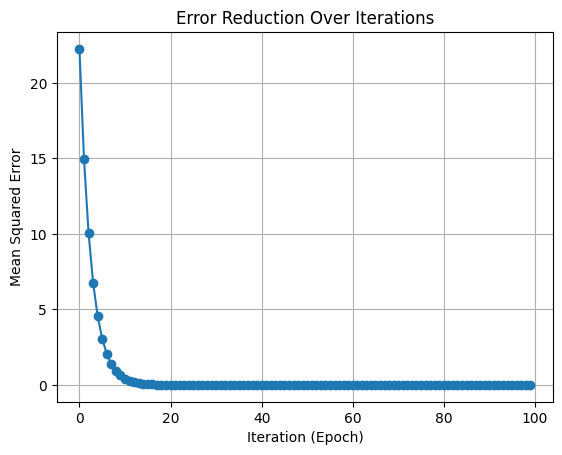

In [285]:
# Plot the error over iterations
plt.plot(range(epochs), errors, marker='o')
plt.xlabel("Iteration (Epoch)")
plt.ylabel("Mean Squared Error")
plt.title("Error Reduction Over Iterations")
plt.grid()
#plt.ylim(0, 1)
plt.show()

---

## Make this changes:
* Change the learning rate
* Change the epochs
* Change the weights to:
    * Zeros
    * Ones
* Change the bias to:
    * Zeros
    * Ones